In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
# jobid = 16636
jobid = 16677

out_dir = './analysis_output/job' + str(jobid)
Z, σ, mom_list, prop_mom_list = analysis.load_mu_sigma(out_dir)

<IPython.core.display.Javascript object>


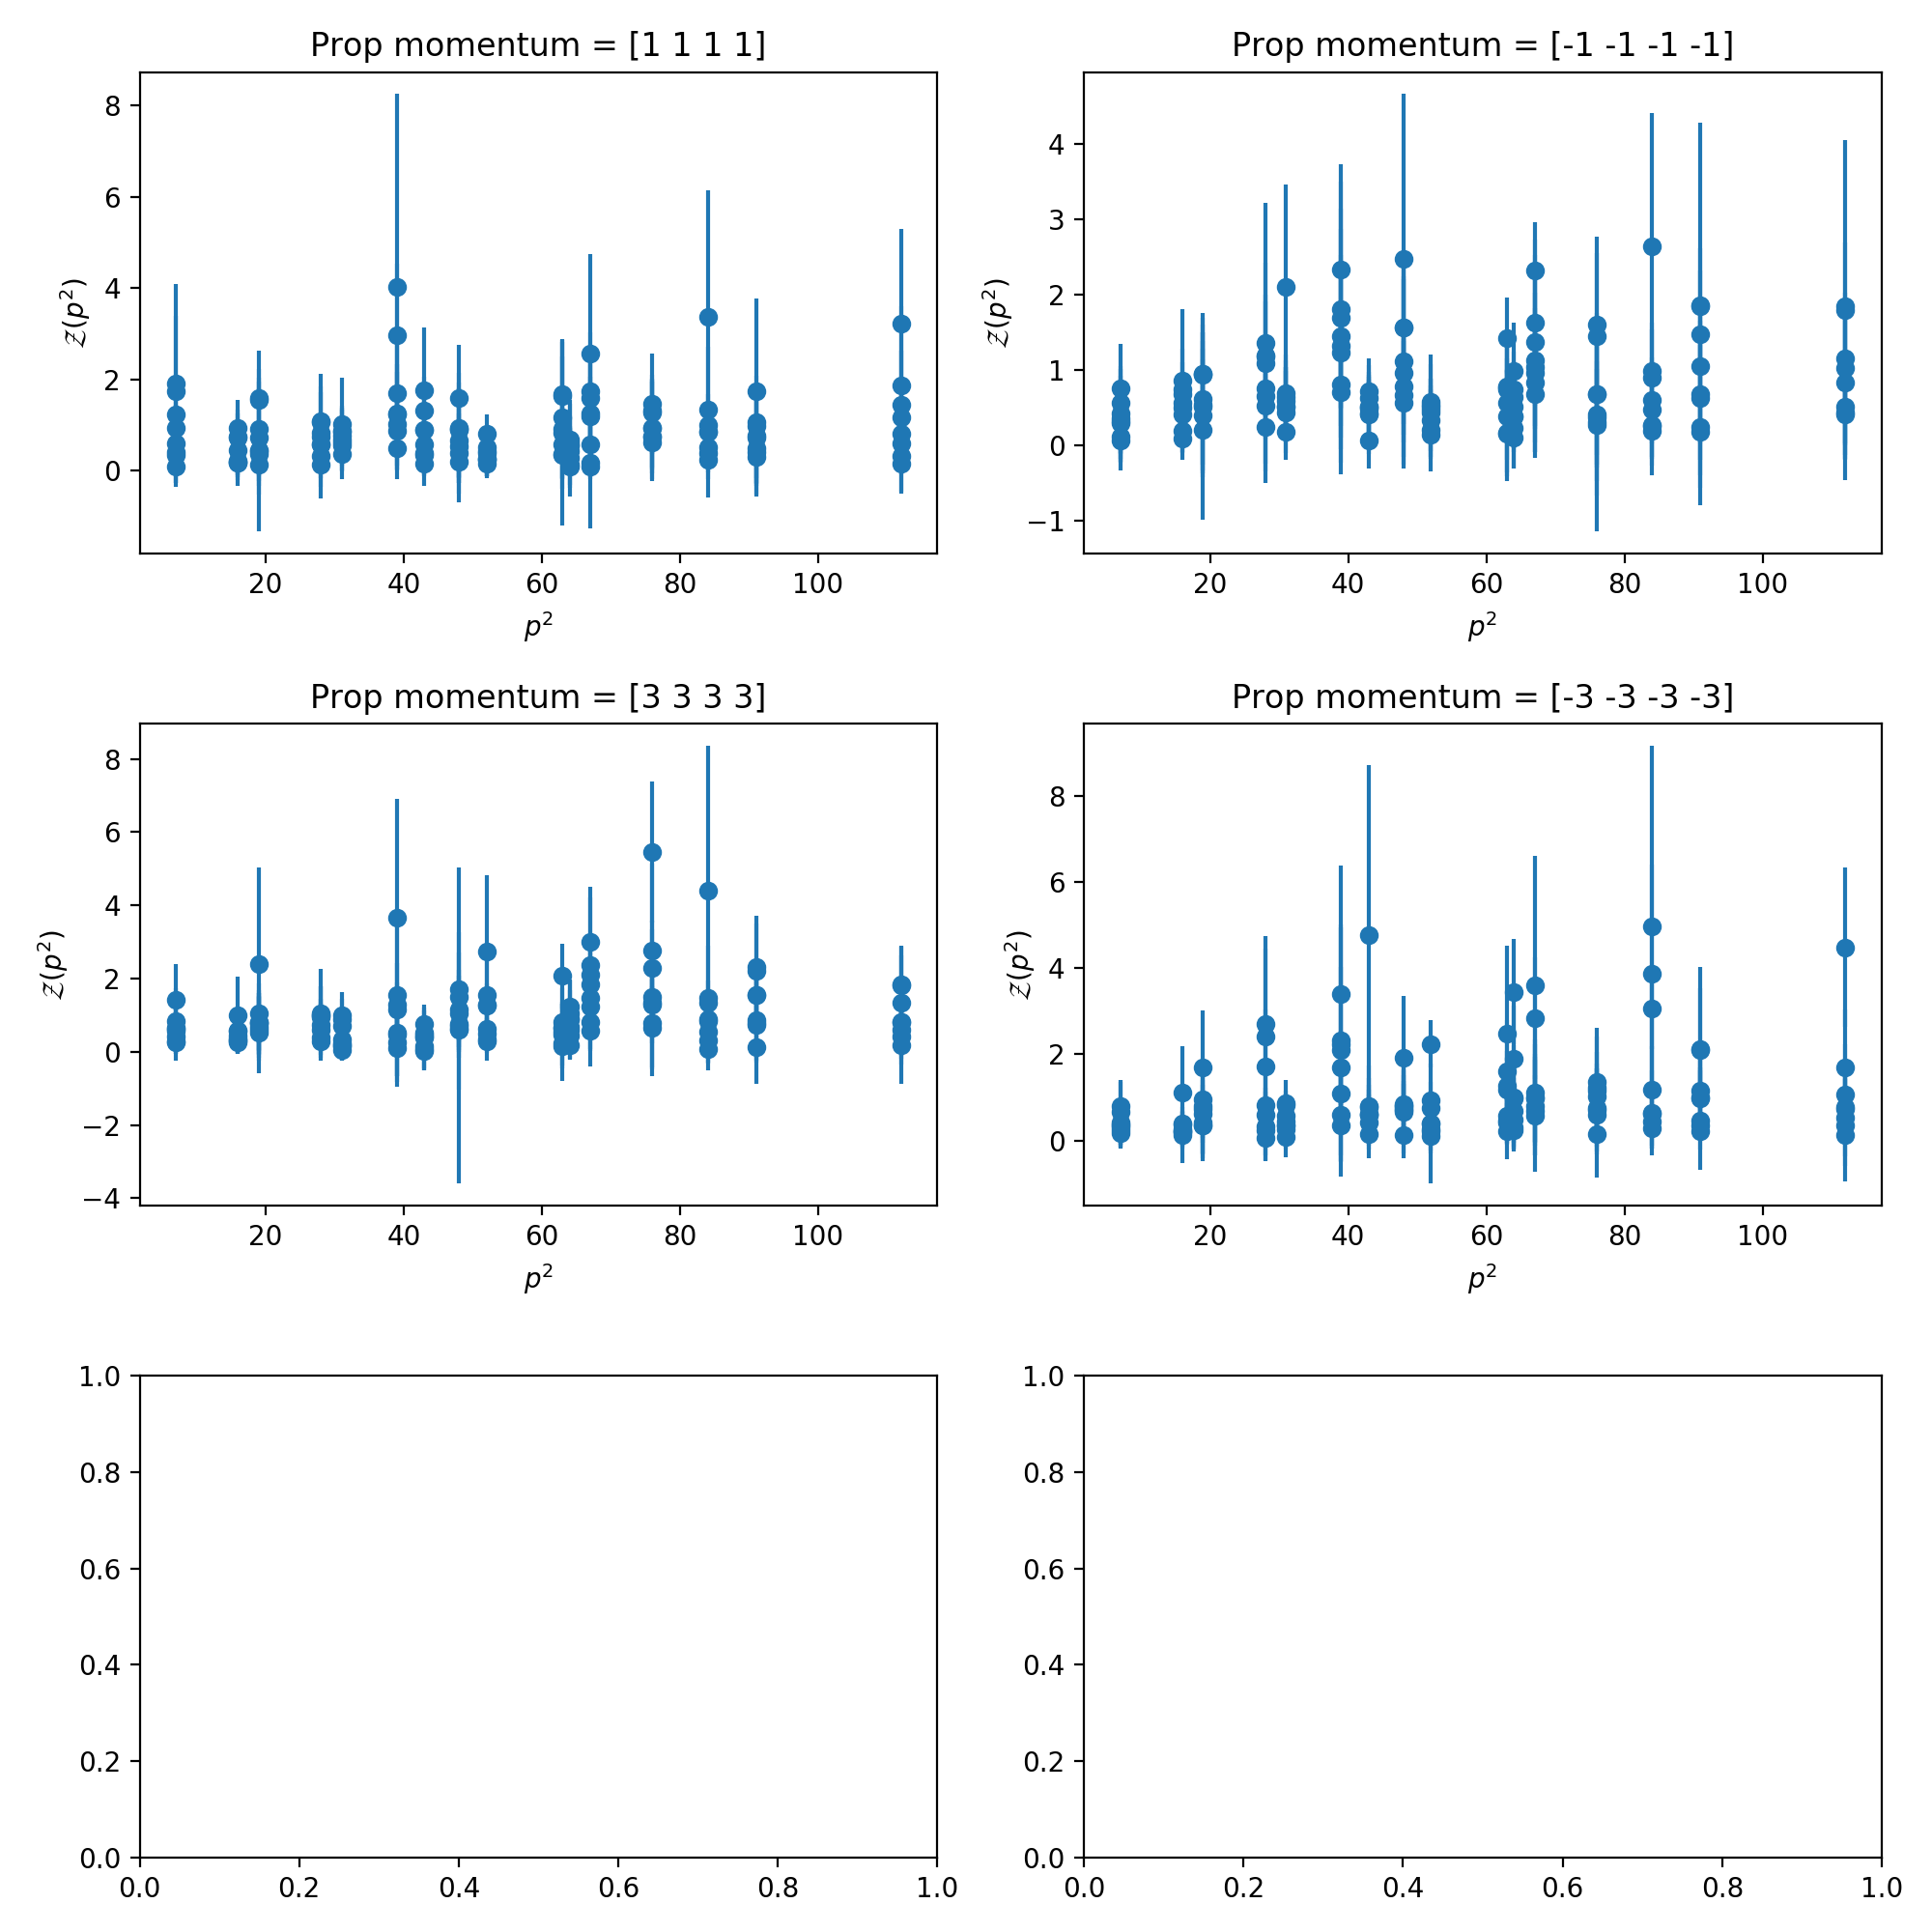

In [3]:
Z_list, σ_list = [], []
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax = ax.flatten()
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
for idx in range(len(prop_mom_list)):
    Z_list.append(np.array([Z[idx][analysis.plist_to_string(p)] for p in mom_list]))
    σ_list.append(np.array([σ[idx][analysis.plist_to_string(p)] for p in mom_list]))
    ax[idx].errorbar(p_squared, np.abs(Z_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o')
    ax[idx].set_xlabel('$p^2$')
    ax[idx].set_ylabel('$\mathcal{Z}(p^2)$')
    ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
# plt.title('Renormalization of quark operator')
plt.show()

<IPython.core.display.Javascript object>


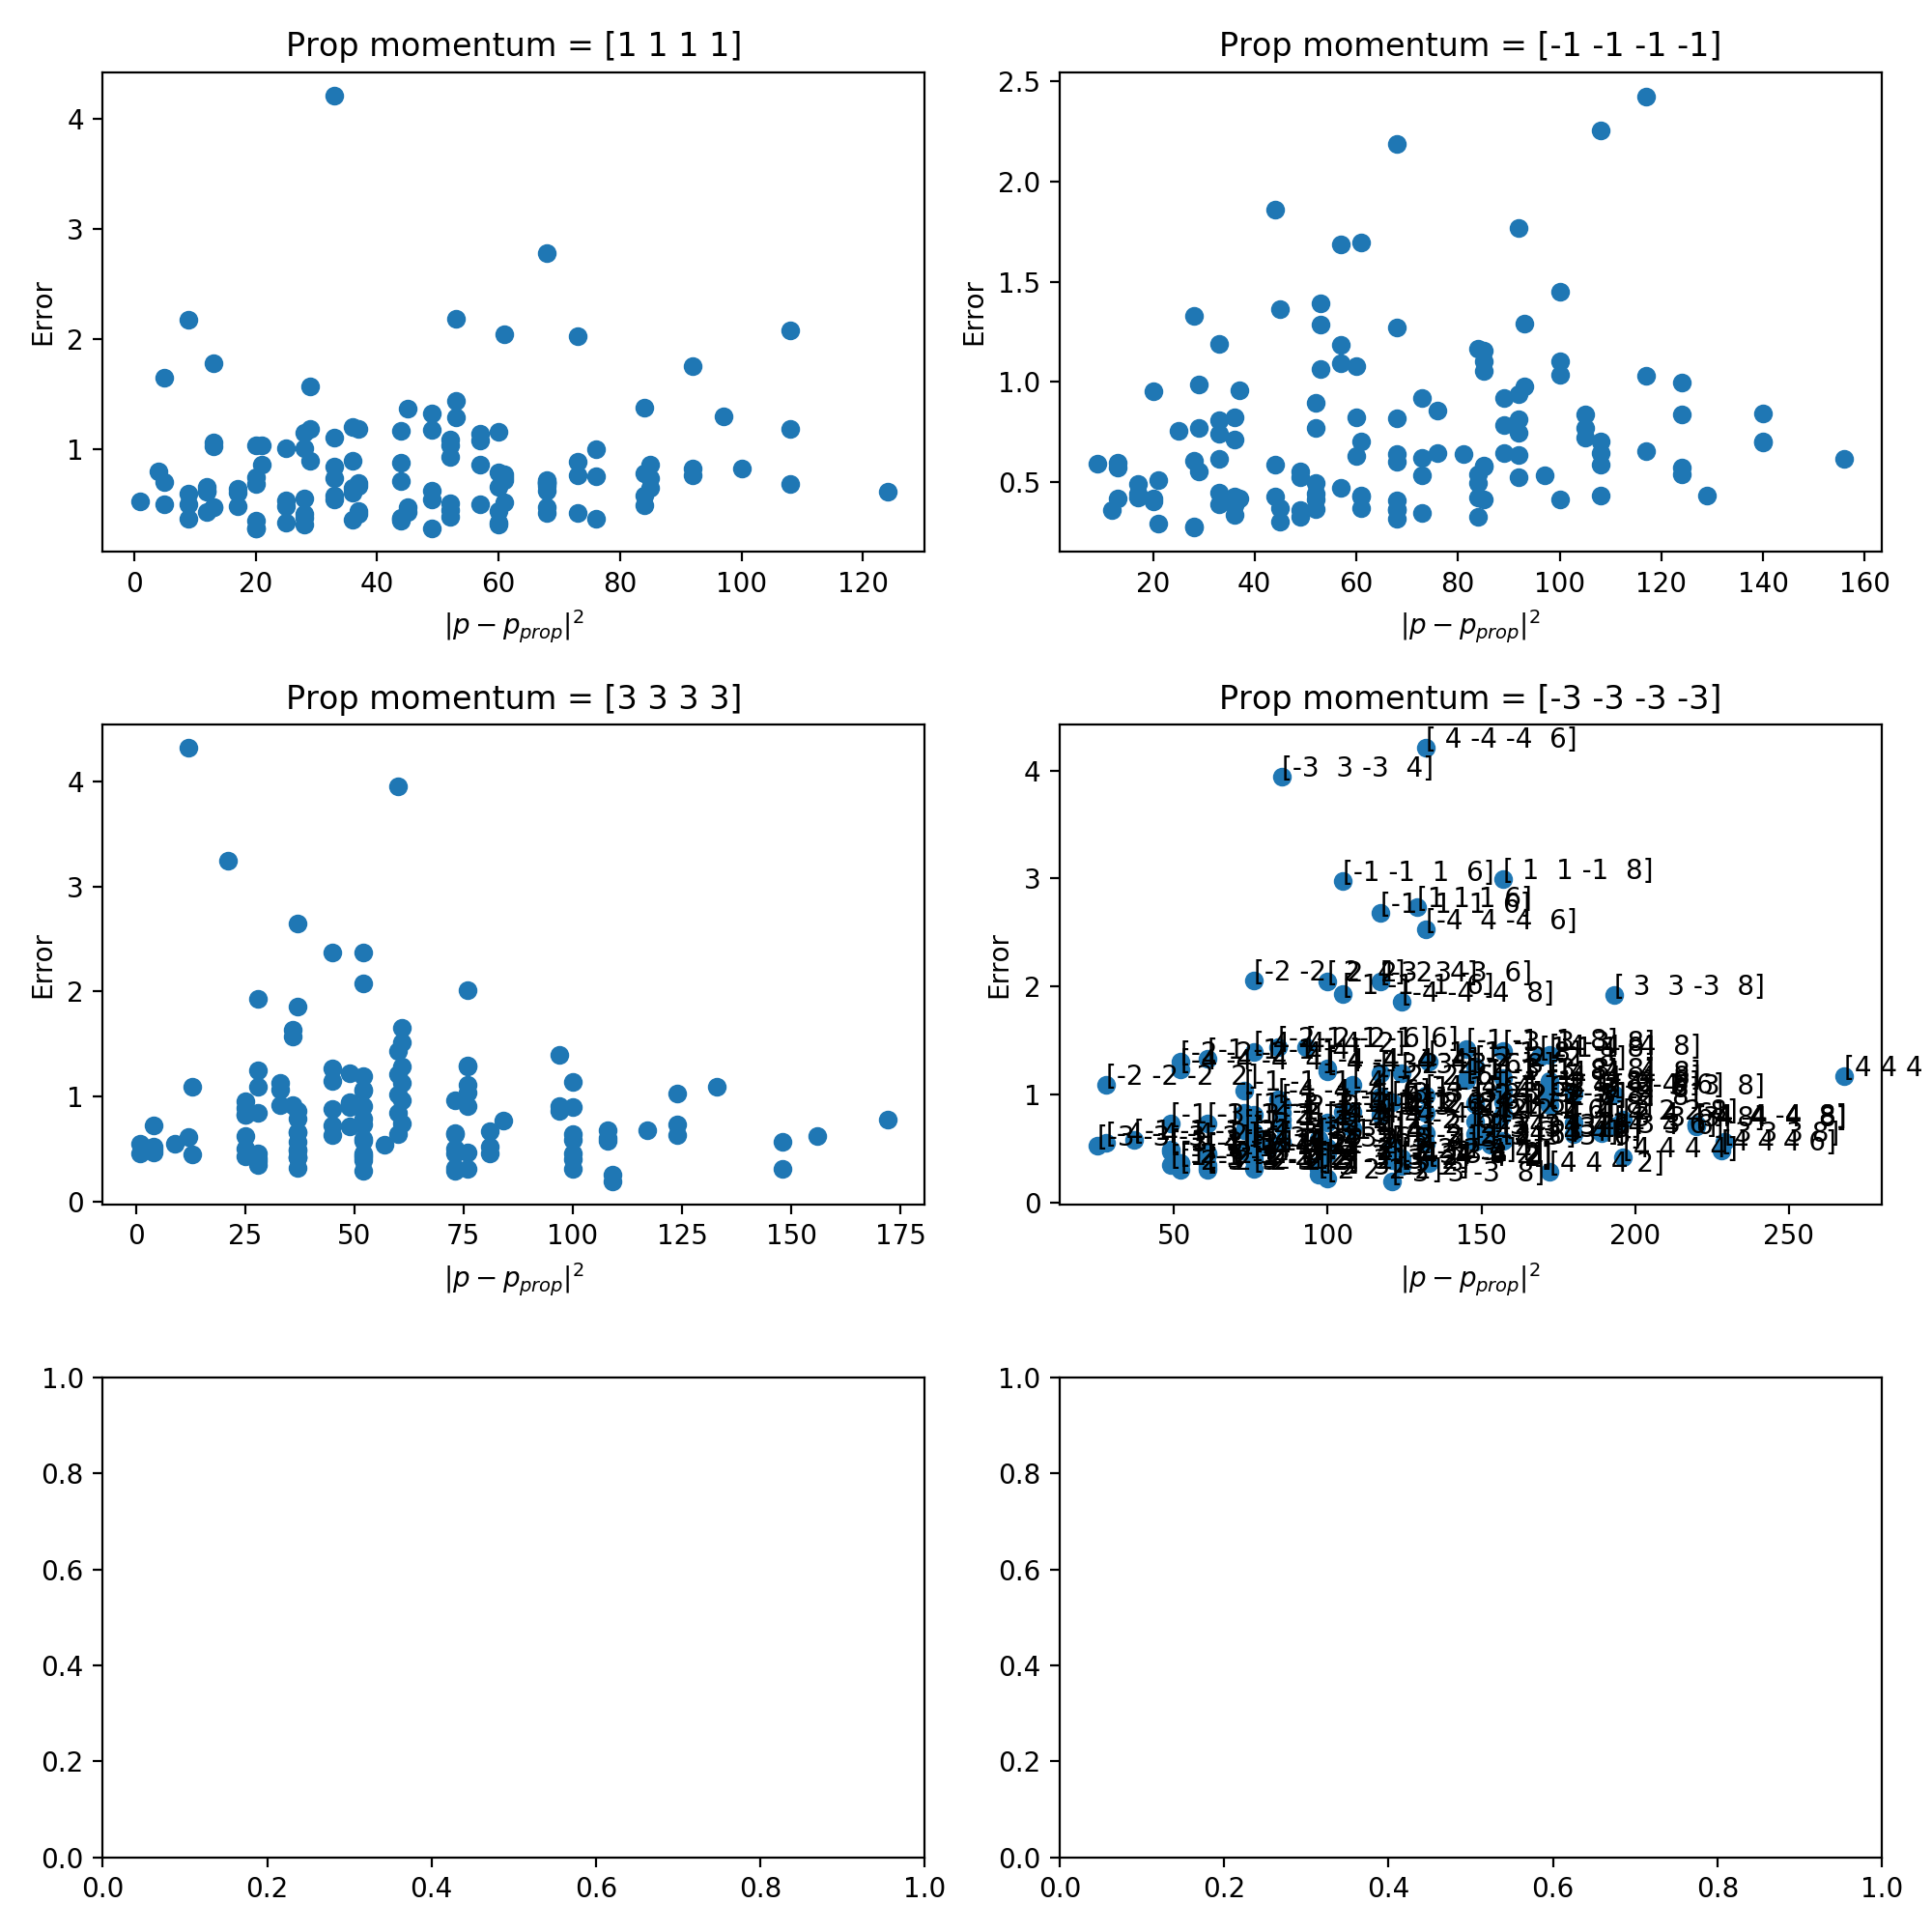

In [4]:
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
f1, ax1 = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax1 = ax1.flatten()
for idx, mom in enumerate(prop_mom_list):
    rsquared = [analysis.square(np.array(p) - np.array(mom)) for p in mom_list]
    ax1[idx].scatter(rsquared, σ_list[idx])
    #for i, p in enumerate(mom_list):
    #    ax1[idx].annotate(mom_list[i], (rsquared[i], σ_list[idx][i]))
    ax1[idx].set_xlabel('$|p - p_{prop}|^2$')
    ax1[idx].set_ylabel('Error')
    ax1[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
plt.show()

In [5]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/Plots/errors16636.pdf')

In [6]:
print(mom_list)

[[ 1  1  1  2]
 [ 1  1 -1  2]
 [ 1 -1  1  2]
 [ 1 -1 -1  2]
 [-1  1  1  2]
 [-1  1 -1  2]
 [-1 -1  1  2]
 [-1 -1 -1  2]
 [ 1  1  1  4]
 [ 1  1 -1  4]
 [ 1 -1  1  4]
 [ 1 -1 -1  4]
 [-1  1  1  4]
 [-1  1 -1  4]
 [-1 -1  1  4]
 [-1 -1 -1  4]
 [ 1  1  1  6]
 [ 1  1 -1  6]
 [ 1 -1  1  6]
 [ 1 -1 -1  6]
 [-1  1  1  6]
 [-1  1 -1  6]
 [-1 -1  1  6]
 [-1 -1 -1  6]
 [ 1  1  1  8]
 [ 1  1 -1  8]
 [ 1 -1  1  8]
 [ 1 -1 -1  8]
 [-1  1  1  8]
 [-1  1 -1  8]
 [-1 -1  1  8]
 [-1 -1 -1  8]
 [ 2  2  2  2]
 [ 2  2 -2  2]
 [ 2 -2  2  2]
 [ 2 -2 -2  2]
 [-2  2  2  2]
 [-2  2 -2  2]
 [-2 -2  2  2]
 [-2 -2 -2  2]
 [ 2  2  2  4]
 [ 2  2 -2  4]
 [ 2 -2  2  4]
 [ 2 -2 -2  4]
 [-2  2  2  4]
 [-2  2 -2  4]
 [-2 -2  2  4]
 [-2 -2 -2  4]
 [ 2  2  2  6]
 [ 2  2 -2  6]
 [ 2 -2  2  6]
 [ 2 -2 -2  6]
 [-2  2  2  6]
 [-2  2 -2  6]
 [-2 -2  2  6]
 [-2 -2 -2  6]
 [ 2  2  2  8]
 [ 2  2 -2  8]
 [ 2 -2  2  8]
 [ 2 -2 -2  8]
 [-2  2  2  8]
 [-2  2 -2  8]
 [-2 -2  2  8]
 [-2 -2 -2  8]
 [ 3  3  3  2]
 [ 3  3 -3  2]
 [ 3 -3  3

In [7]:
# psub = subset of sink momenta to graph
# props_sub = subset of propagators to use (number of graphs to show)
# label = if True, will label each point with its momenta
def graph_subset(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx in range(len(props_sub)):
        Zsub = np.array([Z[idx][analysis.plist_to_string(p)] for p in psub])
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].errorbar(p_squared_sub, np.abs(Zsub), yerr = np.abs(σsub), fmt = 'o')
        if label:
            for i, p in enumerate(p_squared_sub):
                ax[idx].annotate(psub[i], (p, np.abs(Zsub[i])))
        ax[idx].set_xlabel('$p^2$')
        ax[idx].set_ylabel('$\mathcal{Z}(p^2)$')
        ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
    plt.tight_layout()
    plt.show()
def graph_subset_error(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx, mom in enumerate(props_sub):
        rsquaredsub = [analysis.square(np.array(p) - np.array(mom)) for p in psub]
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].scatter(rsquaredsub, σsub)
        if label:
            for i, r in enumerate(rsquaredsub):
                ax[idx].annotate(psub[i], (r, σsub[i]))
        ax[idx].set_xlabel('$|p - p_{prop}|^2$')
        ax[idx].set_ylabel('Error')
        ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
    plt.tight_layout()
    plt.show()

[[1 1 1 2]
 [2 2 2 2]
 [2 2 2 4]
 [3 3 3 2]
 [3 3 3 4]
 [4 4 4 2]
 [4 4 4 4]
 [4 4 4 6]]


<IPython.core.display.Javascript object>


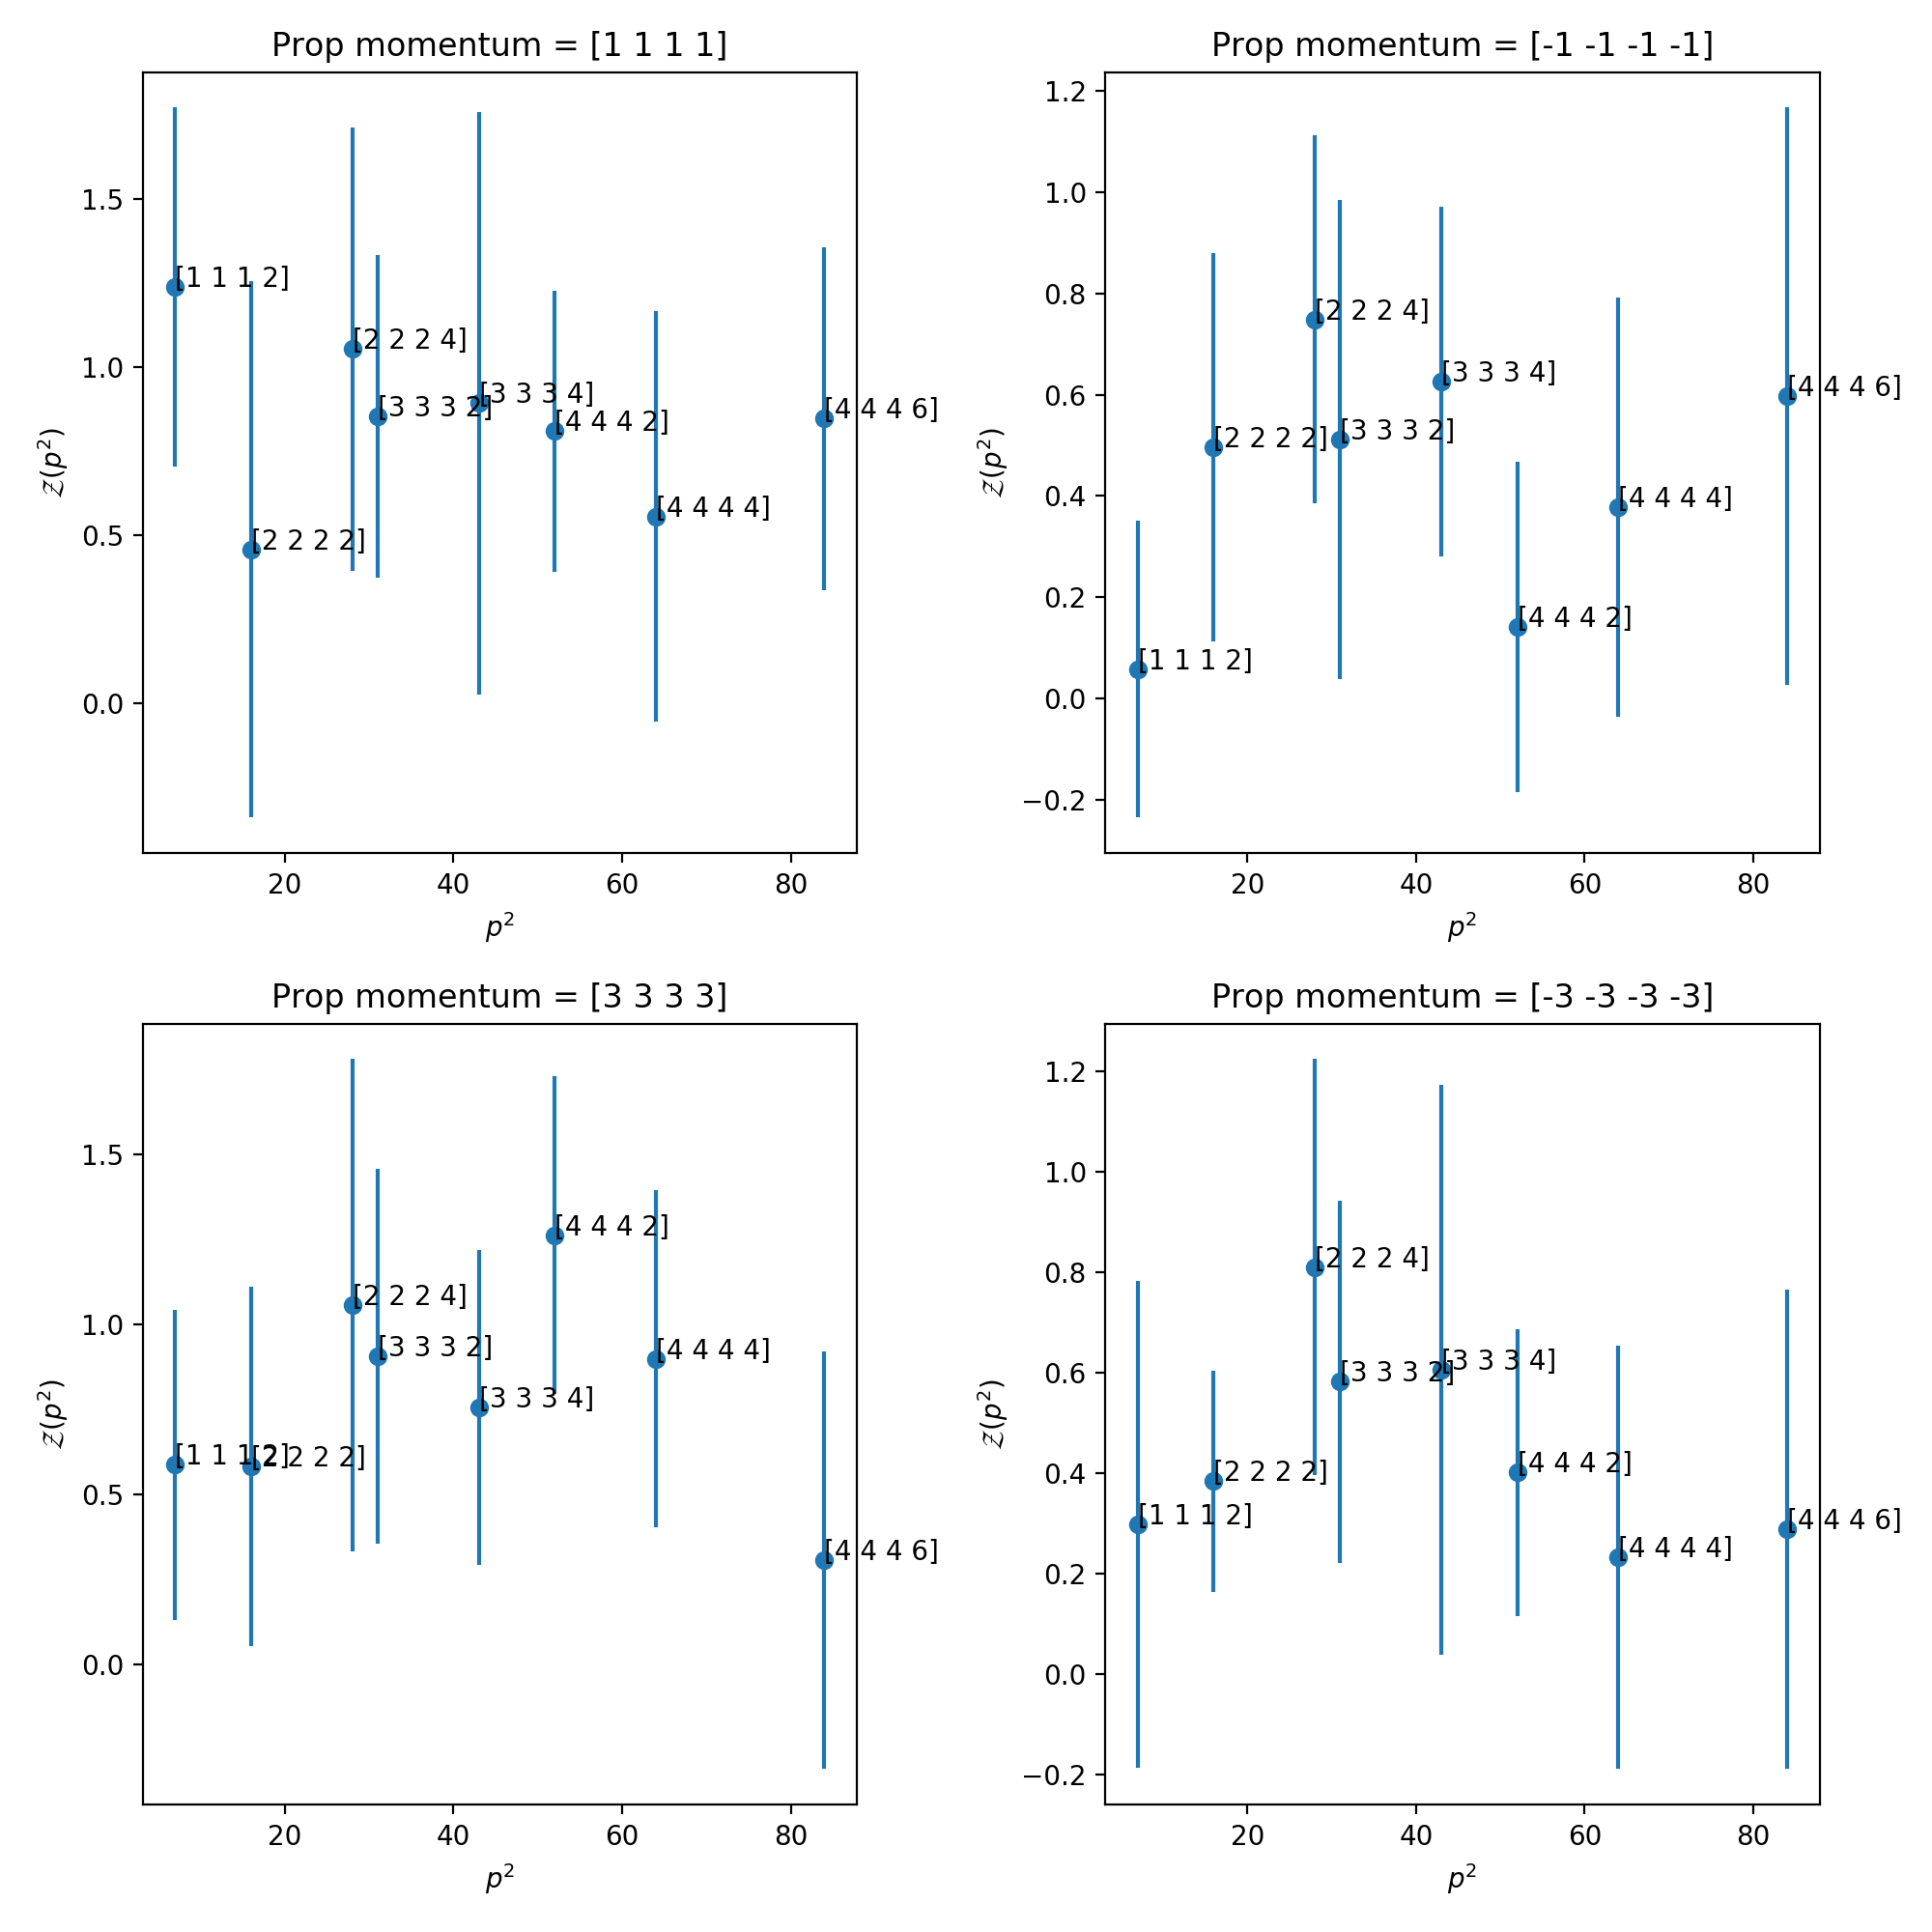

/Users/theoares/miniconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [8]:
# psub = [p for p in mom_list if p[0] > 0 and p[1] > 0 and p[2] > 0 and p[3] == 2]
# psub = [p for p in mom_list if p[0] == p[1] and p[1] == p[2]]
psub = analysis.cylinder(mom_list, 2)
# psub = []
# for i in range(1, 4 + 1):
#     for j in range(2, 8 + 1, 2):
#         if j + 1 >= i and not (i == 8 and j == 10):
#             psub.append([i, i, i, j])
print(psub)

props_sub = prop_mom_list
# props_sub = prop_mom_list[:2]

graph_subset(psub, props_sub, label = True)

In [9]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/Plots/Z_sub.pdf')

<IPython.core.display.Javascript object>


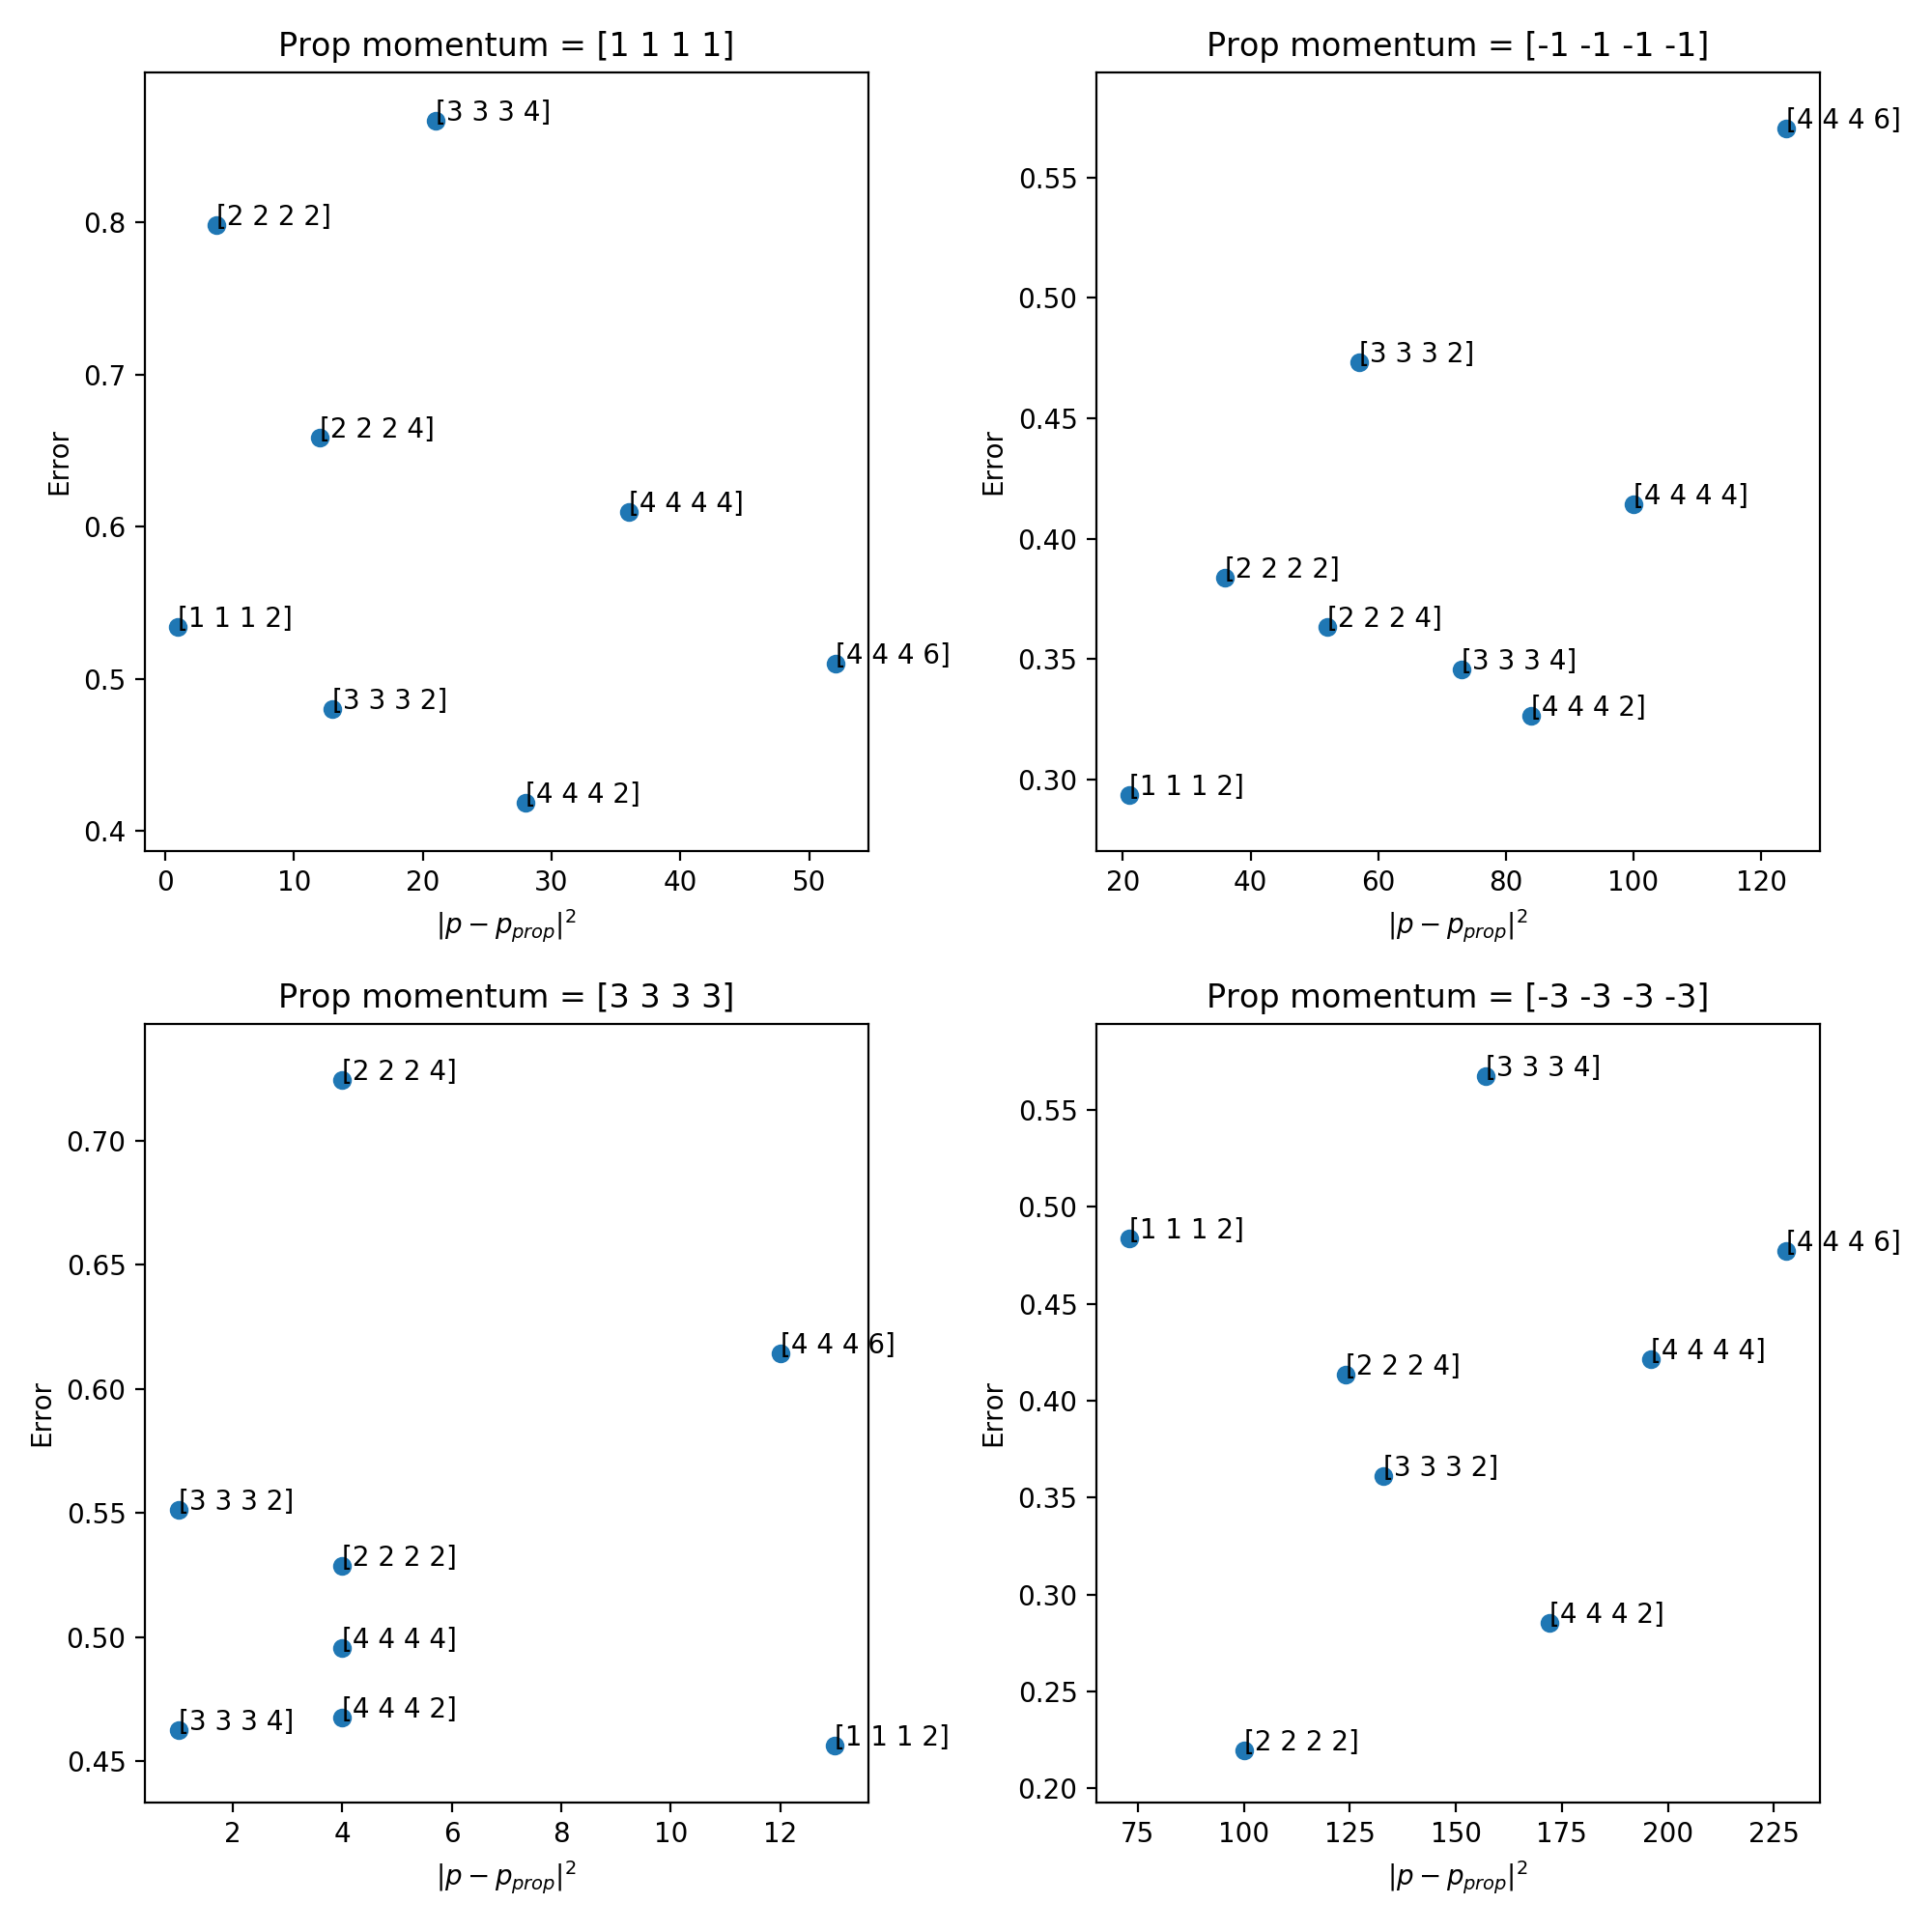

In [10]:
graph_subset_error(psub, props_sub, label = True)